# <p id="Top">NSE Stocks analysis for year 2018

<img src="img/stocks.jpg" style="height : 250px;width:100%">


## I have selected TechM, Cipla & DMart stocks for this analysis.
#### There are following key featues
#### 1. [Fetching data from NSE](#FetchData)
#### 2. [Calculate Rolling Mean](#RollingMean)
#### 3. [Plot a graph](#GraphPlot)
#### 4. [Plot a graph with 2 Y axis](#graphwith2yaxis)
#### 5. [Check stock price deviation from original price](#stockDeviation)
#### 6. [Merge all Stocks in a single DataFrame Object](#allStocks)
#### 7. [Calculate the returns for the stocks](#CalculateReturns)
#### 8. [Pairplot for returns](#pairplot)
#### 9. [Calculate correlation for returns of the stocks](#correlation)
#### 10. [Heatmap & cluster heatmap for returns correlation](#Heatmap)

In [1]:
from datetime import date
from nsepy import  get_history
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### <p id="FetchData">Fetching Data from NSE </p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

In [2]:
vstart=date(2018,1,1)
vend=date(2019,1,1)
techm = get_history(symbol='TECHM',start=vstart,end=vend)
cipla = get_history(symbol='CIPLA',start=vstart,end=vend)
dmart = get_history(symbol='DMART',start=vstart,end=vend)

In [3]:
techm.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-12-26,TECHM,EQ,697.90,695.9,697.90,686.00,695.50,693.55,690.50,1881689,1.299298e+14,49065,713908,0.3794
2018-12-27,TECHM,EQ,693.55,702.0,713.50,696.15,708.90,708.90,707.60,3018106,2.135626e+14,68600,771251,0.2555
2018-12-28,TECHM,EQ,708.90,710.0,718.40,710.00,713.00,714.00,714.09,1863654,1.330810e+14,55310,500507,0.2686
2018-12-31,TECHM,EQ,714.00,720.0,726.45,715.10,721.65,723.15,719.99,1814655,1.306529e+14,44878,551860,0.3041
2019-01-01,TECHM,EQ,723.15,715.0,721.45,715.00,720.60,719.10,718.29,815535,5.857868e+13,18357,125917,0.1544


In [4]:
cipla.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-12-26,CIPLA,EQ,518.8,515.6,519.00,507.30,515.00,514.30,512.19,1318560,6.753481e+13,27138,348578,0.2644
2018-12-27,CIPLA,EQ,514.3,518.9,521.00,514.00,520.40,517.90,517.02,1351636,6.988293e+13,37001,467805,0.3461
2018-12-28,CIPLA,EQ,517.9,514.3,525.35,514.30,522.00,522.00,522.62,1933464,1.010465e+14,36662,640619,0.3313
2018-12-31,CIPLA,EQ,522.0,522.0,526.00,517.20,519.00,519.50,519.89,1897948,9.867300e+13,40937,689375,0.3632
2019-01-01,CIPLA,EQ,519.5,520.0,524.00,518.65,522.75,523.05,522.02,1361809,7.108979e+13,19012,489802,0.3597


In [5]:
dmart.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-12-26,DMART,EQ,1545.75,1534.7,1562.90,1501.30,1554.0,1554.85,1535.33,544718,8.363226e+13,23587,67264,0.1235
2018-12-27,DMART,EQ,1554.85,1565.0,1578.00,1558.05,1571.0,1570.15,1569.25,260792,4.092468e+13,12694,64014,0.2455
2018-12-28,DMART,EQ,1570.15,1580.0,1669.50,1574.00,1656.0,1654.95,1628.66,1053408,1.715648e+14,42197,264618,0.2512
2018-12-31,DMART,EQ,1654.95,1660.0,1678.55,1595.00,1605.7,1606.65,1627.74,1175518,1.913434e+14,49363,239950,0.2041
2019-01-01,DMART,EQ,1606.65,1610.0,1620.75,1586.05,1590.0,1590.75,1597.45,542359,8.663935e+13,22278,107907,0.1990


### <p id="RollingMean">Calculate rolling mean</p>
It's always better to consider more days while observing a stock. Rolling mean calculates average of the given number of days to fulfill this requirement.
[<div style="float:right">Go to Top</div>](#Top)

In [6]:
techm_mov_avg = techm.Close.rolling(5).mean()
cipla_mov_avg = cipla.Close.rolling(5).mean()
dmart_mov_avg = dmart.Close.rolling(5).mean()
dmart_mov_avg.head(15)

Date
2018-01-01        NaN
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05    1192.31
2018-01-08    1203.57
2018-01-09    1218.39
2018-01-10    1231.34
2018-01-11    1239.82
2018-01-12    1238.06
2018-01-15    1238.47
2018-01-16    1229.05
2018-01-17    1212.66
2018-01-18    1190.65
2018-01-19    1172.60
Name: Close, dtype: float64

### <p id ="GraphPlot">Plot a graph</p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

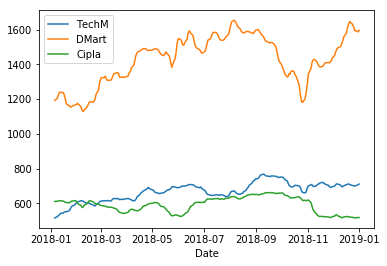

In [7]:
techm_mov_avg.plot(label='TechM')
dmart_mov_avg.plot(label='DMart')
cipla_mov_avg.plot(label='Cipla')
plt.legend()
plt.show()

In [8]:
stocks = pd.DataFrame({'TechM':techm_mov_avg,
                       'Cipla':cipla_mov_avg,
                       'DMart':dmart_mov_avg})
stocks = stocks[5:]
stocks.head(10)

,TechM,Cipla,DMart
Date,,,
2018-01-08,523.54,612.31,1203.57
2018-01-09,527.52,613.87,1218.39
2018-01-10,532.05,616.46,1231.34
2018-01-11,537.88,615.58,1239.82
2018-01-12,542.94,614.97,1238.06
2018-01-15,544.43,614.01,1238.47
2018-01-16,549.19,611.17,1229.05
2018-01-17,551.75,608.65,1212.66
2018-01-18,551.94,606.91,1190.65


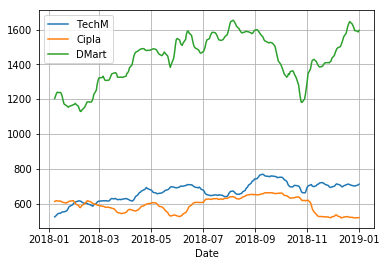

In [9]:
stocks.plot(grid = True)

### <p id="graphwith2yaxis">Plot a graph with 2 Y axis</p>
To observe the graphs of elements having different ranges we can use multiple Y axis to observer it in a better way. Secondary elements can be observed using the Y axis on the right side of the plot.
[<div style="float:right;">Go to Top</div>](#Top)

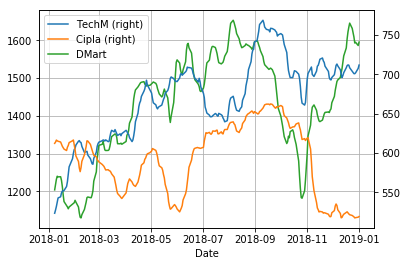

In [10]:
stocks.plot(secondary_y = ["Cipla", "TechM"], grid = True)

### <p id="stockDeviation">Check stock price deviation from original price</p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

In [11]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head(10)
#stocks.head()

,TechM,Cipla,DMart
Date,,,
2018-01-08,1.000000,1.000000,1.000000
2018-01-09,1.007602,1.002548,1.012313
2018-01-10,1.016255,1.006778,1.023073
2018-01-11,1.027390,1.005340,1.030119
2018-01-12,1.037055,1.004344,1.028656
2018-01-15,1.039901,1.002776,1.028997
2018-01-16,1.048993,0.998138,1.021170
2018-01-17,1.053883,0.994023,1.007553
2018-01-18,1.054246,0.991181,0.989265


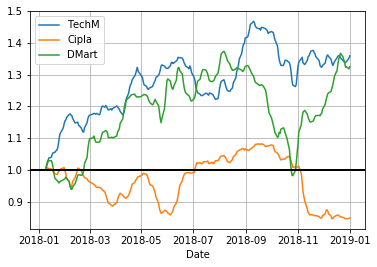

In [12]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

### <p id="allStocks">Merge all Stocks in a single DataFrame Object</p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

In [13]:
ticker=['TechM','Cipla',"DMart"]
all_stocks = pd.concat([techm,cipla,dmart], axis=1, keys=ticker)
all_stocks.head()

TechM                                                          \
           Symbol Series Prev Close   Open   High     Low    Last   Close   
Date                                                                        
2018-01-01  TECHM     EQ     504.05  501.1  508.7  500.05  503.55  503.10   
2018-01-02  TECHM     EQ     503.10  503.5  515.0  503.50  513.60  513.95   
2018-01-03  TECHM     EQ     513.95  516.1  525.0  515.70  517.55  519.45   
2018-01-04  TECHM     EQ     519.45  519.5  525.0  514.00  521.65  522.55   
2018-01-05  TECHM     EQ     522.55  521.0  527.0  514.85  524.95  525.45   

                                ...        DMart                            \
              VWAP   Volume     ...         High      Low    Last    Close   
Date                            ...                                          
2018-01-01  503.71  1115837     ...      1193.25  1166.00  1172.5  1170.50   
2018-01-02  511.71  2204383     ...      1178.20  1155.60  1160.7  1160.00   
2018-01-03  521.47  2288877     ...      1204.40  1160.00  1184.0  1184.55   
2018-01-04  518.46  1460097     ...      1215.00  1186.00  1199.5  1203.10   
2018-01-05  521.80  1756809     ...      1268.00  1208.55  1243.0  1243.40   

                                                                      \
               VWAP   Volume      Turnover Trades Deliverable Volume   
Date                                                                   
2018-01-01  1181.71   334392  3.951560e+13   9339             131250   
2018-01-02  1164.69   302709  3.525631e+13   9423              98217   
2018-01-03  1184.91   580610  6.879719e+13  18731             146459   
2018-01-04  1204.56   707905  8.527130e+13  20998             192081   
2018-01-05  1242.60  1244328  1.546206e+14  39621             375646   

                        
           %Deliverble  
Date                    
2018-01-01      0.3925  
2018-01-02      0.3245  
2018-01-03      0.2523  
2018-01-04      0.2713  
2018-01-05      0.3019  

[5 rows x 42 columns]

### <p id="CalculateReturns">Calculate the returns for the stocks</p>
returns=(Today’s close price - Yesterday’s close price)/ Yesterday’s close price
[<div style="float:right">Go to Top</div>](#Top)

In [14]:
returns = pd.DataFrame()

for i in ticker:
    returns[i + ' Return'] = all_stocks.xs((i, 'Close'), axis=1).pct_change()

returns.dropna(inplace=True)

returns.head()

,TechM Return,Cipla Return,DMart Return
Date,,,
2018-01-02,0.021566,-0.006051,-0.008971
2018-01-03,0.010701,-0.001645,0.021164
2018-01-04,0.005968,0.016397,0.015660
2018-01-05,0.005550,-0.002594,0.033497
2018-01-08,0.020649,-0.000163,-0.013350


### <p id ="pairplot">Pairplot for returns</p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

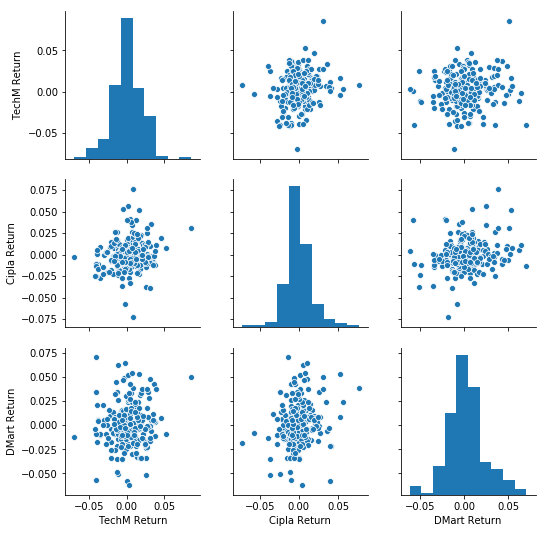

In [15]:
sns.pairplot(returns)

In [16]:
returns.idxmin()

TechM Return    2018-06-28
Cipla Return    2018-11-05
DMart Return    2018-12-24
dtype: object

In [17]:
returns.idxmax()

TechM Return    2018-10-31
Cipla Return    2018-02-08
DMart Return    2018-11-02
dtype: object

In [18]:
returns.std()

TechM Return    0.019289
Cipla Return    0.016975
DMart Return    0.021383
dtype: float64

In [19]:
returns.describe()

,TechM Return,Cipla Return,DMart Return
count,246.000000,246.000000,246.000000
mean,0.001638,-0.000492,0.001474
std,0.019289,0.016975,0.021383
min,-0.070004,-0.072558,-0.062102
25%,-0.010155,-0.009854,-0.010037
50%,0.001289,-0.001806,-0.000182
75%,0.013837,0.007430,0.010685
max,0.085827,0.076241,0.070566


### <p id="correlation">Calculate correlation for returns of the stocks</p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

In [20]:
stock_close = all_stocks.xs('Close', level=1, axis=1)

all_close_corr = stock_close.corr()
all_close_corr

,TechM,Cipla,DMart
TechM,1.000000,0.020712,0.612512
Cipla,0.020712,1.000000,-0.016901
DMart,0.612512,-0.016901,1.000000


### <p id="Heatmap">Heatmap & cluster heatmap for returns correlation</p>
[<div style="float:right;margin-top:-50px">Go to Top</div>](#Top)

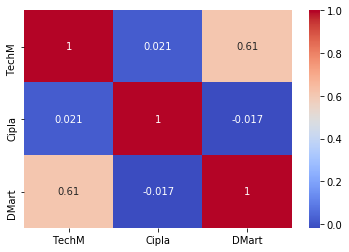

In [21]:
sns.heatmap(all_close_corr, annot = True, cmap='coolwarm')

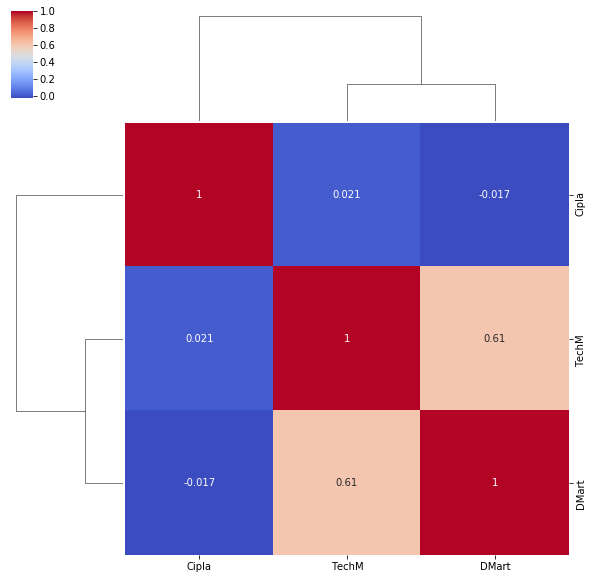

In [22]:
sns.clustermap(all_close_corr, annot = True, cmap='coolwarm')